## 넘버원_1팀_서울공공데이터_미니공모전

* 데이터 출처: http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)
1. 공공자전거 이용정보(시간대별) 2020.9~ 2021.1
* 데이터를 선택한 이유: 실용성있는 데이터를 분석해 봄으로써 생활에 필요한 서비스를 데이를 통해서 고찰해보고 싶었습니다. 
* 공공 데이터 활용방안: 

In [ ]:

#metplotlib의 한글 폰트 코랩설치
!apt -qq -y install fonts-nanum
mpl.font_manager._rebuild()
#[메뉴] - [런타임] - [런타임 다시 시작] 후 아래 셀부터 실행

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt  #https://wikidocs.net/92114
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#데이터 마운트
% cd /content/drive/MyDrive

/content/drive/MyDrive


## 데이터 불러오기
* 시간대별 대여 현황 2021년 1월 데이터
* 각 column별 결측치 확인 및 데이터 시각화

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/usepertime.csv', encoding='cp949', engine='python', error_bad_lines=False ) #,, sep=',', quotechar='"',
data.head()

Skipping line 489207: unexpected end of data


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [ ]:
data.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
489200,2021-01-24,17,945,945. 기자촌 사거리,정기권,NaN,~10대,1,38.17,0.35,1530.00,86
489201,2021-01-24,17,1036,1036. 고덕동 주양쇼핑,정기권,NaN,~10대,1,62.42,0.64,2765.32,33
489202,2021-01-24,17,1151,1151. 마곡역1번출구,정기권,NaN,~10대,1,46.73,0.52,2226.61,19
489203,2021-01-24,17,1251,1251. 석촌역 2번출구,정기권,NaN,~10대,1,21.75,0.22,931.04,6
489204,2021-01-24,17,1264,1264. 천호역 10번 출구 앞,정기권,NaN,~10대,1,78.68,0.81,3485.87,108


In [ ]:
#(행, 열) : 총 12개 카테고리의 489205개의 값이 들어있다.
data.shape

(489205, 12)

In [ ]:
#각 항목의 자료형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489205 entries, 0 to 489204
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    489205 non-null  object 
 1   대여시간    489205 non-null  int64  
 2   대여소번호   489205 non-null  int64  
 3   대여소명    489205 non-null  object 
 4   대여구분코드  489205 non-null  object 
 5   성별      273447 non-null  object 
 6   연령대코드   489205 non-null  object 
 7   이용건수    489205 non-null  int64  
 8   운동량     489205 non-null  object 
 9   탄소량     489205 non-null  object 
 10  이동거리    489205 non-null  float64
 11  사용시간    489205 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 44.8+ MB


In [ ]:
#숫자형 데이터의 요약
data.describe()

,대여시간,대여소번호,이용건수,이동거리,사용시간
count,489205.000000,489205.000000,489205.000000,489205.000000,489205.000000
mean,14.030249,1435.958208,1.081267,2859.169878,27.653015
std,5.174007,1006.632406,0.322535,4123.265943,32.972912
min,0.000000,3.000000,1.000000,0.000000,0.000000
25%,11.000000,592.000000,1.000000,712.300000,8.000000
50%,15.000000,1221.000000,1.000000,1578.760000,15.000000
75%,18.000000,2107.000000,1.000000,3347.490000,36.000000
max,23.000000,9999.000000,14.000000,240570.000000,1753.000000


## 각 항목별 결측치확인 및 metplotlib으로 시각화

In [ ]:
# 결측치 확인
data.isnull().sum()
# 성별 결측치가 확인 됨.

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        215758
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

### 성별 column

In [ ]:
#성별의 결측치를 제거하고 시각화 해보자!!
gender = data[['성별']].dropna()
print(gender)
# print(type(gender))
# print(len(gender))

gender.iloc[0] == 'F'

       성별
134     F
135     F
136     F
137     F
138     F
...    ..
489194  M
489195  M
489196  M
489197  M
489198  M

[273447 rows x 1 columns]


성별    True
Name: 134, dtype: bool

In [ ]:
#성별 데이터를 metplotlib의 파이차트로 시각화
#남성데이터와 여성 데이터로 나눠주기
female = []
man = []
for gen in range(len(gender)):
    # print(gen)
    if gender.iloc[gen].item() == 'F':
        female.append(gen)
    elif gender.iloc[gen].item() == 'M': #
        man.append(gen)

print(f'여성 이용자 수: {len(female)}')
print(f'남성 이용자 수: {len(man)}')

여성 이용자 수: 92693
남성 이용자 수: 180580


[92693, 180580]


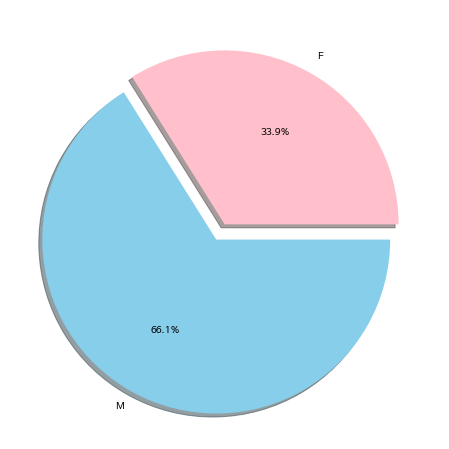

In [ ]:
#성별 pie chart
ratio = [len(female),len(man)]
print(ratio)


figure = plt.figure(figsize=(8,8))
axes = figure.add_subplot(111)
explode = [0, 0.10]



axes.pie(ratio, labels = ['F', 'M'],  autopct='%.1f%%', explode=explode, colors =  ['pink', 'skyblue'], shadow=True ) #
plt.show()

## 연령column

In [ ]:
# 연령대 확인
ages = data[['연령대코드']]
print(ages)

       연령대코드
0       ~10대
1       ~10대
2       ~10대
3       ~10대
4       ~10대
...      ...
489200  ~10대
489201  ~10대
489202  ~10대
489203  ~10대
489204  ~10대

[489205 rows x 1 columns]


In [ ]:
#나이에 숫자만 남기고 데이터 정리해주기
ages2 = data.연령대코드.str.split('~').str[1] #'~10대' [~][10대]
final_ages = ages2.str.split('대').str[0]#'10대' [10][대]
print(final_ages)

0         10
1         10
2         10
3         10
4         10
          ..
489200    10
489201    10
489202    10
489203    10
489204    10
Name: 연령대코드, Length: 489205, dtype: object


In [ ]:
#연령대코드 pie chart
set_ages = set(final_ages)
print(set_ages)
# 정리를 하고 보니 연령대 값은 사용할 수 없다. (정확하지 않고 정보가 없다)

{nan, '', '10'}


## 대여권

In [ ]:
#대여구분코드
ticket = data[['대여구분코드']]
print(ticket)
set_ticket = data[['대여구분코드']].value_counts()
print(set_ticket)

       대여구분코드
0         정기권
1         정기권
2         정기권
3         정기권
4         정기권
...       ...
489200    정기권
489201    정기권
489202    정기권
489203    정기권
489204    정기권

[489205 rows x 1 columns]
대여구분코드  
정기권         402880
일일권          84291
단체권           2028
일일권(비회원)         6
dtype: int64


In [ ]:
final_tck = data[['대여구분코드']].replace("정기권", 1).replace("일일권", 2).replace("단체권", 3).replace("일일권(비회원)", 4)
print(final_tck)

        대여구분코드
0            1
1            1
2            1
3            1
4            1
...        ...
489200       1
489201       1
489202       1
489203       1
489204       1

[489205 rows x 1 columns]


In [ ]:
tck1 = []
tck2 = []
tck3 = []
tck4 = []
for tck in range(len(final_tck)):
    # print(tck)
    if final_tck.iloc[tck].item() == 1:
        tck1.append(tck)
    elif final_tck.iloc[tck].item() == 2:
        tck2.append(tck)
    elif final_tck.iloc[tck].item() == 3:
        tck3.append(tck)
    elif final_tck.iloc[tck].item() == 4:
        tck4.append(tck)    

print(f' 정기권 이용자수 : {len(tck1)}')
print(f'일일권 이용자수: {len(tck2)}')
print(f'단체권 이용자수: {len(tck3)}')
print(f'일일권(비회원) 이용자수: {len(tck4)}')

 정기권 이용자수 : 402880
일일권 이용자수: 84291
단체권 이용자수: 2028
일일권(비회원) 이용자수: 6


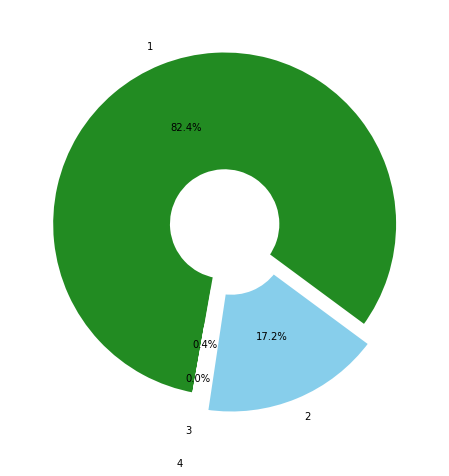

In [ ]:
#티켓 pie chart
tck_ratio = [len(tck1),len(tck2),len(tck3),len(tck4)]
#print(tck_ratio)


figure = plt.figure(figsize=(8,8))
axes = figure.add_subplot(111)
explode = [0, 0.10, 0.10, 0.30 ]
colors = ['forestgreen', 'skyblue', 'darkorange', 'red' ]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
label = ['1', '2', '3', '4'] #['정기권', '일일권', '단체권', '일일권(비회원)']

axes.pie(tck_ratio, labels = label,  startangle=260, counterclock=False, autopct='%.1f%%', explode=explode, colors = colors, shadow=False, wedgeprops=wedgeprops )
plt.show()

## 

## 시간대별 대여소 이용건수 데이터 EDA  

* 시간대별 이용건수
* 대여소별 이용건수
* 일자별 이용건수
* 대여소별&시간대별 이용건수

## 2021년 1월 데이터만

In [ ]:
#따릉이 시간대별 이용현황 분석

plt.figure(figsize = (12,6))


Text(18, 41000, '퇴근')

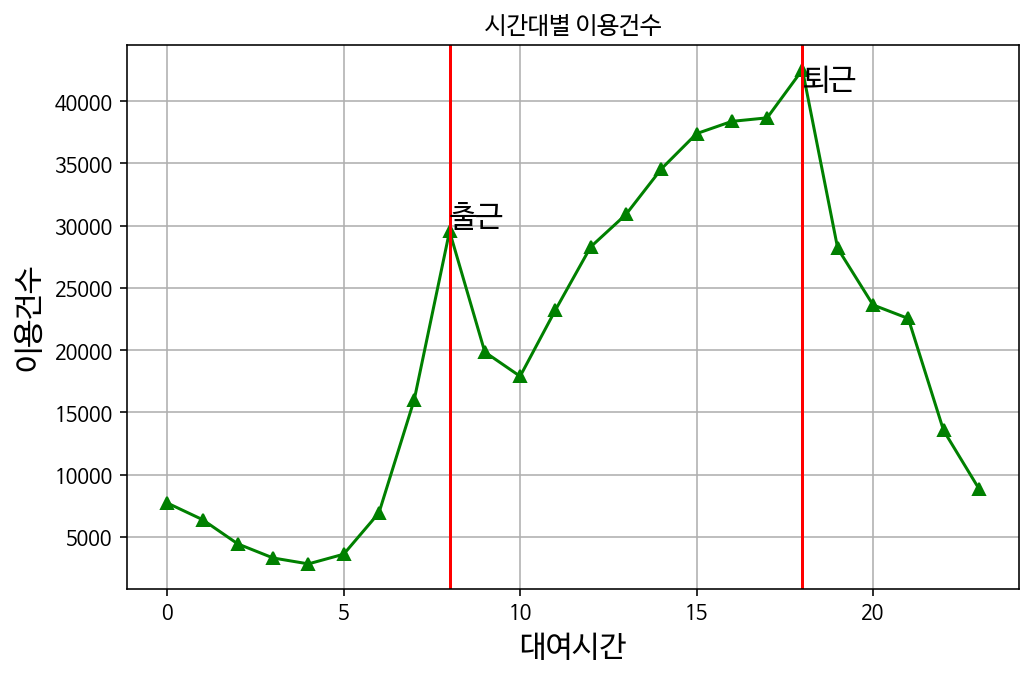

In [ ]:
#시간대별 이용건수 시각화
plt.figure(figsize=(8,5))
plt.plot(data.groupby('대여시간').count()['이용건수'], 'g^-')
plt.grid()
plt.title('시간대별 이용건수')
plt.xlabel('대여시간', fontsize = 15)
plt.ylabel('이용건수', fontsize = 15)

plt.axvline(8, color = 'r')
plt.axvline(18, color = 'r')

plt.text(8, 30000, '출근', fontsize = 15)
plt.text(18, 41000, '퇴근', fontsize = 15)
#plt.savefig('chart_useperhour')

In [ ]:
data[['대여소번호']].describe()

,대여소번호
count,489205.000000
mean,1435.958208
std,1006.632406
min,3.000000
25%,592.000000
50%,1221.000000
75%,2107.000000
max,9999.000000


In [ ]:
data.groupby('대여소번호').count()

,대여일자,대여시간,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
대여소번호,,,,,,,,,,,
3,9,9,9,9,9,9,9,9,9,9,9
5,4,4,4,4,3,4,4,4,4,4,4
10,25,25,25,25,19,25,25,25,25,25,25
101,240,240,240,240,135,240,240,240,240,240,240
102,656,656,656,656,357,656,656,656,656,656,656
...,...,...,...,...,...,...,...,...,...,...,...
4785,74,74,74,74,49,74,74,74,74,74,74
4791,157,157,157,157,97,157,157,157,157,157,157
9980,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
a = data.groupby('대여소번호').count()['이용건수']
a.describe()

count    2188.000000
mean      223.585466
std       170.470570
min         1.000000
25%       100.000000
50%       186.000000
75%       301.000000
max      1216.000000
Name: 이용건수, dtype: float64

In [ ]:
data.groupby('대여소번호')['이용건수'].value_counts().describe()

count    5647.000000
mean       86.630954
std       134.795737
min         1.000000
25%         3.000000
50%        15.000000
75%       129.000000
max       992.000000
Name: 이용건수, dtype: float64

In [ ]:
a = data[['대여소번호','이용건수']].value_counts().tolist( )
print(len(a))

5647


In [ ]:
c = data.groupby(['대여소번호','이용건수']).size().max()
print(c)

992


In [ ]:
b = data[['대여소번호','대여일자','이용건수']].value_counts().tolist( )
print(len(b))

65158


In [ ]:
rental = data.groupby('대여소번호').count()
print(rental)

       대여일자  대여시간  대여소명  대여구분코드   성별  연령대코드  이용건수  운동량  탄소량  이동거리  사용시간
대여소번호                                                                  
3         9     9     9       9    9      9     9    9    9     9     9
5         4     4     4       4    3      4     4    4    4     4     4
10       25    25    25      25   19     25    25   25   25    25    25
101     240   240   240     240  135    240   240  240  240   240   240
102     656   656   656     656  357    656   656  656  656   656   656
...     ...   ...   ...     ...  ...    ...   ...  ...  ...   ...   ...
4785     74    74    74      74   49     74    74   74   74    74    74
4791    157   157   157     157   97    157   157  157  157   157   157
9980      1     1     1       1    1      1     1    1    1     1     1
9997     10    10    10      10   10     10    10   10   10    10    10
9999      6     6     6       6    4      6     6    6    6     6     6

[2188 rows x 11 columns]


In [ ]:
a.max()
#600대 이상의 대여소를 찾자

1216

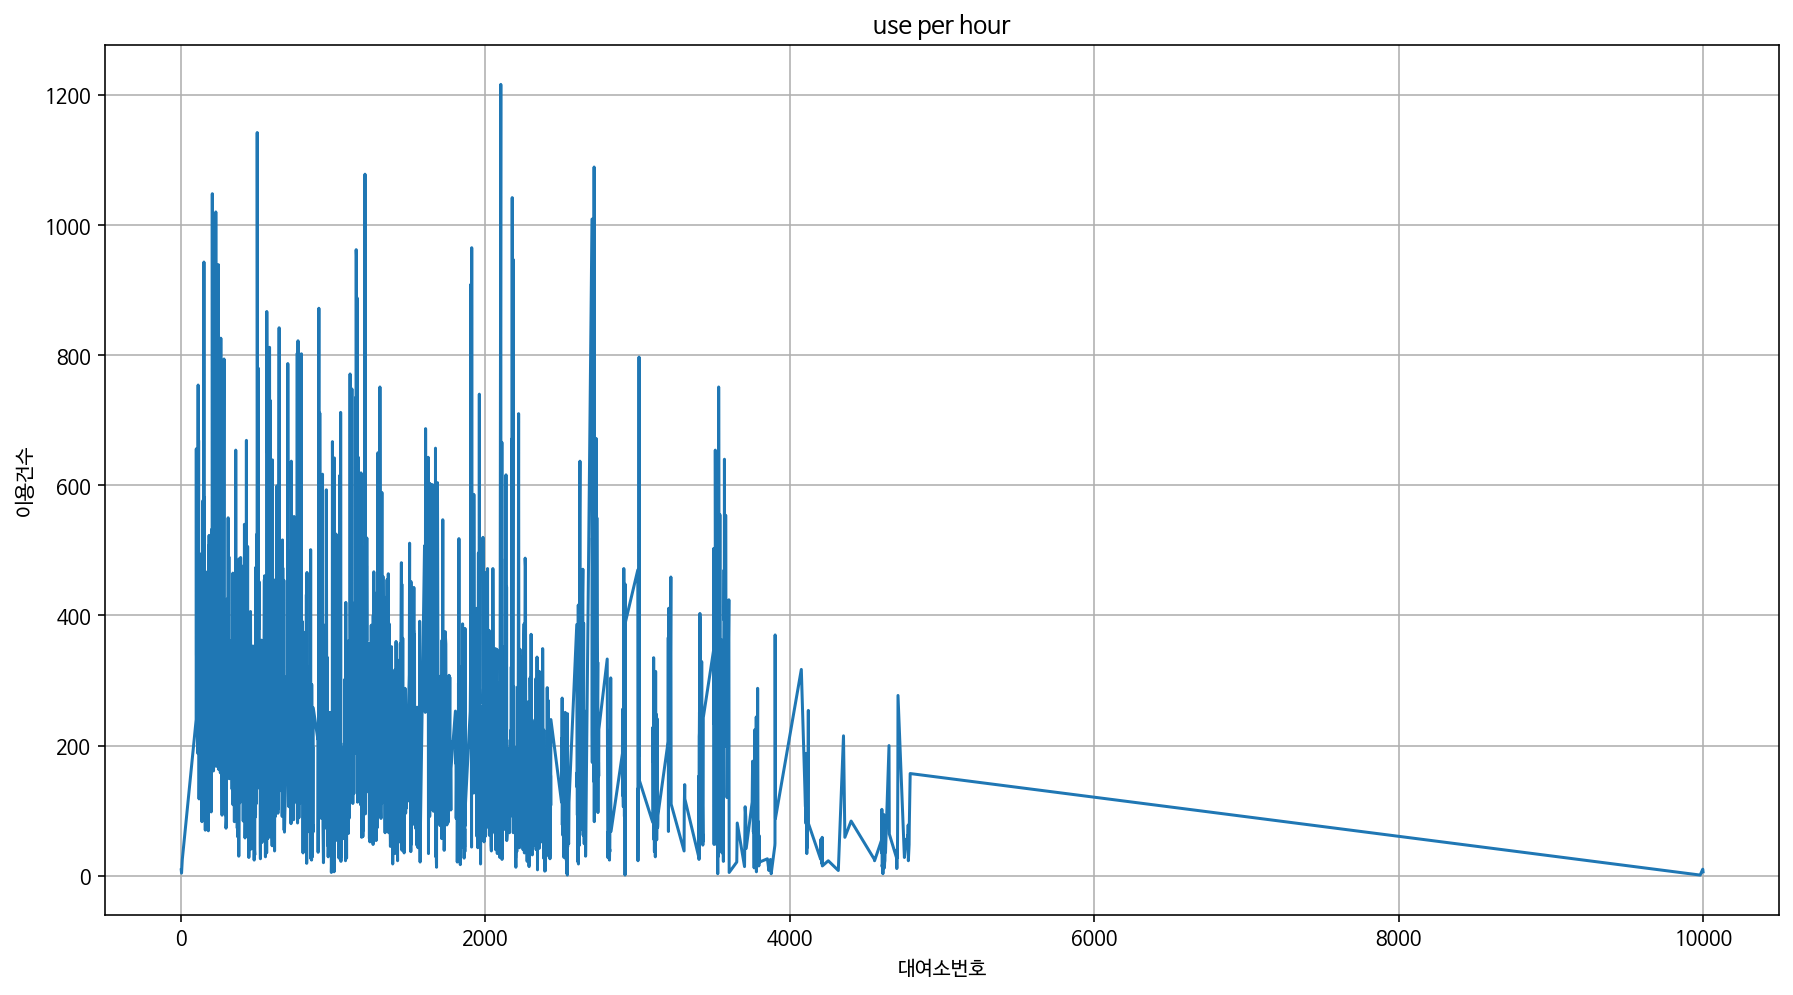

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data2.groupby('대여소번호').count()['이용건수'])
plt.grid()
plt.title('use per hour')
plt.xlabel('대여소번호')
plt.ylabel('이용건수')

# plt.axvline(8, color = 'r')
# plt.axvline(18, color = 'r')

# plt.text(8, 1.10, '출근')
# plt.text(18, 1.10, '퇴근')

# plt.savefig('chart_useperplace')
plt.show()

In [ ]:
#원하는 열 추출
# data.iloc[:,[0]]

In [ ]:
# useDate = data['대여일자'] == '2021-01-01'
# useDate
# uDate = data2[useDate]
# uDate.info()

In [ ]:
#일별 이용건수
data.groupby('대여일자').count()['이용건수']

대여일자
2021-01-01    20310
2021-01-02    21755
2021-01-03    20041
2021-01-04    29875
2021-01-05    26536
2021-01-06    20556
2021-01-07     5350
2021-01-08     7679
2021-01-09     8659
2021-01-10    10494
2021-01-11    18161
2021-01-12    12070
2021-01-13    18251
2021-01-14    29607
2021-01-15    29589
2021-01-16    20911
2021-01-17    16762
2021-01-18    16725
2021-01-19    24778
2021-01-20    33329
2021-01-22    31758
2021-01-23    38340
2021-01-24    27669
Name: 이용건수, dtype: int64

Text(2021-01-22, 31000, '화')

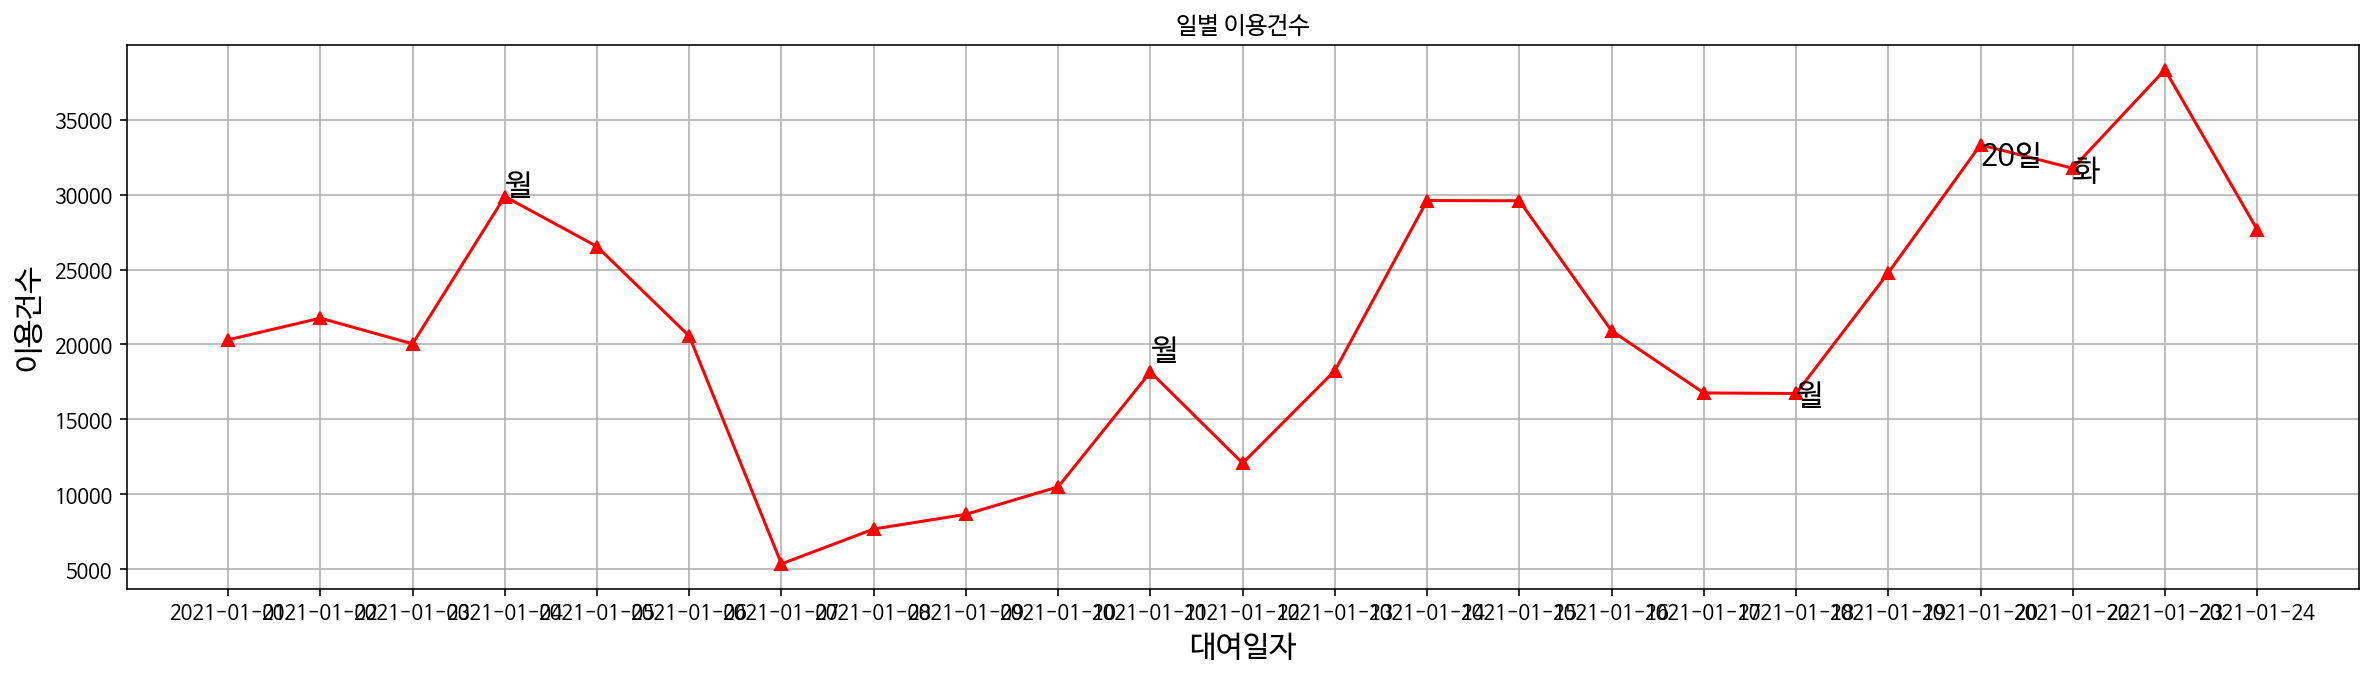

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data.groupby('대여일자').count()['이용건수'], 'r^-')
plt.grid()
plt.title('일별 이용건수')
plt.xlabel('대여일자', fontsize = 15)
plt.ylabel('이용건수', fontsize = 15)

#plt.axvline(2021-01-01,2000 color = 'r')
# plt.axvline(18, color = 'r')

plt.text('2021-01-04',30000 , '월', fontsize = 15)
plt.text('2021-01-11',19000 , '월', fontsize = 15)
plt.text('2021-01-18', 16000, '월', fontsize = 15)
plt.text('2021-01-20', 32000, '20일', fontsize = 15)
plt.text('2021-01-22', 31000, '화', fontsize = 15)
#plt.savefig('chart_useperhour')

In [ ]:
newDate = data[['대여일자','대여소번호','이용건수',]]
newDate

,대여일자,대여소번호,이용건수
0,2021-01-01,1347,2
1,2021-01-01,1349,1
2,2021-01-01,1168,1
3,2021-01-01,2619,1
4,2021-01-01,536,1
...,...,...,...
489200,2021-01-24,945,1
489201,2021-01-24,1036,1
489202,2021-01-24,1151,1
489203,2021-01-24,1251,1


In [ ]:
#Vectorization을 이용한 pandas DataFrame 문자열 칼럼 분할하기
newDate['대여소이름'] = data.대여소명.str.split('.').str[1]

newDate


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,대여일자,대여소번호,이용건수,대여소이름
0,2021-01-01,1347,2,길음래미안아파트817동 상가 앞
1,2021-01-01,1349,1,월계2교 버스정류장 앞
2,2021-01-01,1168,1,마곡엠밸리10단지 앞
3,2021-01-01,2619,1,석촌고분역 4번출구
4,2021-01-01,536,1,행당역 2번출구 앞
...,...,...,...,...
489200,2021-01-24,945,1,기자촌 사거리
489201,2021-01-24,1036,1,고덕동 주양쇼핑
489202,2021-01-24,1151,1,마곡역1번출구
489203,2021-01-24,1251,1,석촌역 2번출구


In [ ]:
# newDate.set_index('대여소번호',inplace=True)
# newDate

In [ ]:
#특정 열이 주어진 조건을 만족하는 행의 인덱스를 가져 오는 작업
reqd_Index = newDate[newDate['대여소번호'] == 2102].index.tolist()
print(len(reqd_Index))

1216


In [ ]:
newDate.iloc[0]

대여일자             2021-01-01
이용건수                      2
대여소이름     길음래미안아파트817동 상가 앞
Name: 1347, dtype: object

In [ ]:
is_jamsil = data['대여소번호'] == 2102
jamsil = data[is_jamsil]
jamsil

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
51,2021-01-01,0,2102,2102. 봉림교 교통섬,정기권,NaN,20대,1,22.90,0.17,722.93,6
360,2021-01-01,0,2102,2102. 봉림교 교통섬,일일권,M,20대,2,512.19,4.62,19898.70,223
540,2021-01-01,1,2102,2102. 봉림교 교통섬,정기권,M,30대,1,40.47,0.30,1277.58,10
605,2021-01-01,1,2102,2102. 봉림교 교통섬,정기권,M,50대,1,0.00,0.00,0.00,9
842,2021-01-01,2,2102,2102. 봉림교 교통섬,정기권,M,30대,1,0.00,0.00,0.00,22
...,...,...,...,...,...,...,...,...,...,...,...,...
487747,2021-01-24,16,2102,2102. 봉림교 교통섬,일일권,NaN,30대,1,171.86,1.80,7749.94,50
488201,2021-01-24,16,2102,2102. 봉림교 교통섬,일일권,F,20대,1,3.05,0.36,1538.71,13
488388,2021-01-24,16,2102,2102. 봉림교 교통섬,일일권,F,30대,3,685.81,6.33,27275.96,148
488778,2021-01-24,16,2102,2102. 봉림교 교통섬,일일권,M,20대,1,33.76,0.32,1374.87,20


## 2020.09~21.01 까지 데이터



* 참고싸이트 : https://hwangtoemat.github.io/dataanalysis-with-python/2019-01-29-%EC%84%9C%EC%9A%B8%EC%8B%9C-%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0-%EB%8C%80%EC%97%AC%EC%86%8C%EB%B3%84-%EC%9D%B4%EC%9A%A9-%EB%B6%84%EC%84%9D_1/

In [ ]:
bt1 = pd.read_csv('/content/drive/MyDrive/bike9.csv', encoding='cp949', engine='python', error_bad_lines=False )
bt2 = pd.read_csv('/content/drive/MyDrive/bike10.csv', encoding='cp949', engine='python', error_bad_lines=False )
bt3 = pd.read_csv('/content/drive/MyDrive/bike11.csv', encoding='cp949', engine='python', error_bad_lines=False )
bt4 = pd.read_csv('/content/drive/MyDrive/bike12.csv', encoding='cp949', engine='python', error_bad_lines=False )
bt5 = pd.read_csv('/content/drive/MyDrive/bike1.csv', encoding='cp949', engine='python', error_bad_lines=False )

Skipping line 512055: unexpected end of data
Skipping line 512836: unexpected end of data
Skipping line 514491: unexpected end of data
Skipping line 514486: unexpected end of data
Skipping line 509058: unexpected end of data


In [ ]:
# 5개월 데이터 합치기 concat
data2 = pd.concat([bt1,bt2,bt3,bt4,bt5]  ) #ignore_index=True
data2.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-09-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,8
1,2020-09-01,0,1532,1532. 번3동 주민센터 교차로,정기권,NaN,~10대,1,0.00,0.00,0.0,3
2,2020-09-01,0,1536,1536. 번동 두산위브 101동 옆,정기권,NaN,~10대,1,59.49,0.47,2030.0,10
3,2020-09-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,0.00,0.00,0.0,55
4,2020-09-01,0,2377,2377. 수서역 5번출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.0,21


In [ ]:
data2.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
509051,2021-01-25,8,678,678.장안힐스테이트(아) 앞,정기권,NaN,40대,2,175.99,1.36,5834.76,35
509052,2021-01-25,8,171,171. 임광빌딩 앞,정기권,NaN,40대,1,18.68,0.14,589.53,3
509053,2021-01-25,8,1462,1462.동부시장 북문 앞,정기권,NaN,40대,1,151.76,1.37,5895.70,23
509054,2021-01-25,8,1470,1470.중화동 우리은행 앞,정기권,NaN,40대,1,118.50,0.95,4099.18,27
509055,2021-01-25,8,3586,3586.군자역 비채온 오피스텔,정기권,NaN,40대,1,80.10,0.45,1926.35,10


In [ ]:
data2.shape

(2562916, 12)

In [ ]:
bpt = data2.copy()
bpt

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-09-01,0,1152,1152. 마곡역교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,8
1,2020-09-01,0,1532,1532. 번3동 주민센터 교차로,정기권,NaN,~10대,1,0.00,0.00,0.00,3
2,2020-09-01,0,1536,1536. 번동 두산위브 101동 옆,정기권,NaN,~10대,1,59.49,0.47,2030.00,10
3,2020-09-01,0,1650,1650. 중계근린공원내,정기권,NaN,~10대,1,0.00,0.00,0.00,55
4,2020-09-01,0,2377,2377. 수서역 5번출구 뒤,정기권,NaN,~10대,1,0.00,0.00,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...
509051,2021-01-25,8,678,678.장안힐스테이트(아) 앞,정기권,NaN,40대,2,175.99,1.36,5834.76,35
509052,2021-01-25,8,171,171. 임광빌딩 앞,정기권,NaN,40대,1,18.68,0.14,589.53,3
509053,2021-01-25,8,1462,1462.동부시장 북문 앞,정기권,NaN,40대,1,151.76,1.37,5895.70,23
509054,2021-01-25,8,1470,1470.중화동 우리은행 앞,정기권,NaN,40대,1,118.50,0.95,4099.18,27


In [ ]:
#필요없는 columns 삭제
del bpt['운동량']
del bpt['연령대코드']
del bpt['성별']
del bpt['대여구분코드']
del bpt['탄소량']

bpt.head()

,대여일자,대여시간,대여소번호,대여소명,이용건수,이동거리,사용시간
0,2020-09-01,0,1152,1152. 마곡역교차로,1,0.0,8
1,2020-09-01,0,1532,1532. 번3동 주민센터 교차로,1,0.0,3
2,2020-09-01,0,1536,1536. 번동 두산위브 101동 옆,1,2030.0,10
3,2020-09-01,0,1650,1650. 중계근린공원내,1,0.0,55
4,2020-09-01,0,2377,2377. 수서역 5번출구 뒤,1,0.0,21


In [ ]:
bike_eda = bpt[['대여시간', '대여소번호', '이용건수']]
bike_eda

,대여시간,대여소번호,이용건수
0,0,1152,1
1,0,1532,1
2,0,1536,1
3,0,1650,1
4,0,2377,1
...,...,...,...
509051,8,678,2
509052,8,171,1
509053,8,1462,1
509054,8,1470,1


In [ ]:
#월별로 나눌 필요가 없기때문에 (대여소변호,대여시간)을 key로 이용건수를 합친다.
grouped_eda = bike_eda[['이용건수']].groupby([bike_eda['대여소번호'],bike_eda['대여시간']])

Bike_Time_cumsum = grouped_eda.sum()  
Bike_Time_rent = bike_eda.drop_duplicates(["대여소번호",'대여시간'])[['대여소번호','대여시간']]      
Bike_Time_rent = Bike_Time_rent.sort_values(by=["대여소번호",'대여시간'])  
Bike_Time_cumsum = Bike_Time_cumsum.reset_index(drop='True')                          
Bike_Time_rent = Bike_Time_rent.reset_index(drop='True')

bike_eda = pd.concat([Bike_Time_rent, Bike_Time_cumsum], axis=1) 
bike_eda.head(23)

,대여소번호,대여시간,이용건수
0,3,5,1
1,3,9,9
2,3,10,1
3,3,11,5
4,3,12,4
5,3,14,1
6,3,15,7
7,3,16,2
8,3,17,3
9,3,18,3


In [ ]:
bike_eda.tail()

,대여소번호,대여시간,이용건수
50879,99999,9,2
50880,99999,10,4
50881,99999,11,1
50882,99999,13,9
50883,99999,15,1


In [ ]:
#데이터의 통합을 위해 자료형을 바꿔준다.
bike_eda['이용건수'] = bike_eda['이용건수'].apply(lambda x : int(x))
bike_eda.head()

,대여소번호,대여시간,이용건수
0,3,5,1
1,3,9,9
2,3,10,1
3,3,11,5
4,3,12,4


Text(18, 2200, '18')

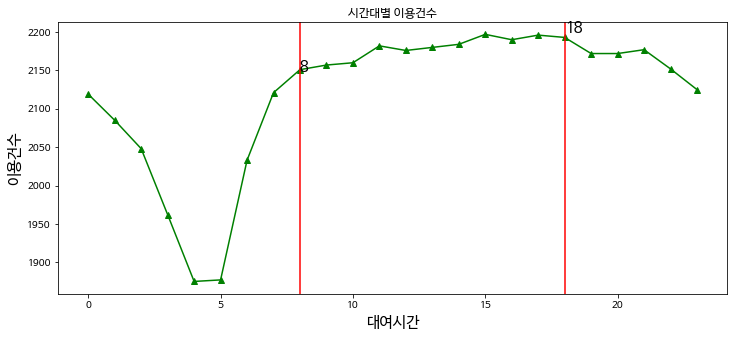

In [ ]:
#시간대별 이용건수 시각화
plt.figure(figsize=(12,5))
plt.plot(bike_eda.groupby('대여시간').count()['이용건수'], 'g^-')
#plt.grid()
plt.title('시간대별 이용건수')
plt.xlabel('대여시간', fontsize = 15)
plt.ylabel('이용건수', fontsize = 15)

plt.axvline(8, color = 'r')
plt.axvline(18, color = 'r')

plt.text(8, 2150, '8', fontsize = 15)
plt.text(18, 2200, '18', fontsize = 15)
#plt.savefig('chart_useperhour')

(50884,) (50884,)


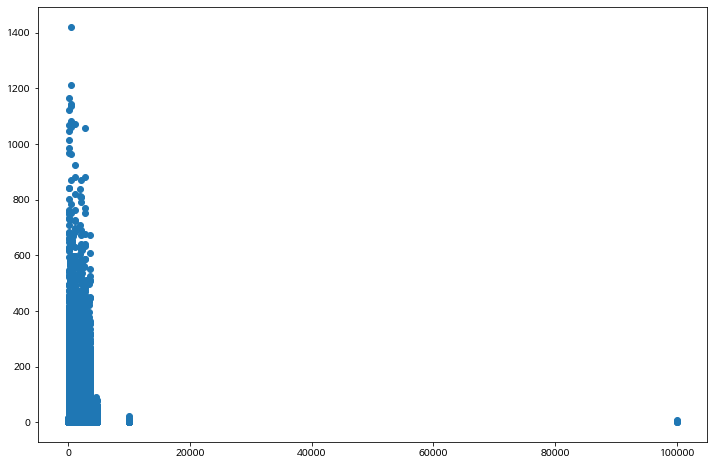

In [ ]:
#대여소별 이용건수
import numpy as np
x = np.array(bike_eda['대여소번호'])          #입력 데이터
y = np.array(bike_eda['이용건수'])    #출력 데이터
print(x.shape, y.shape) 

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.show()

In [ ]:
scater_data = bike_eda.copy()

f_data = scater_data['대여소번호'] <=5000

total_data = bike_eda[f_data]
total_data

,대여소번호,대여시간,이용건수
0,3,5,1
1,3,9,9
2,3,10,1
3,3,11,5
4,3,12,4
...,...,...,...
50841,4791,19,7
50842,4791,20,19
50843,4791,21,9
50844,4791,22,3


(50846,) (50846,)


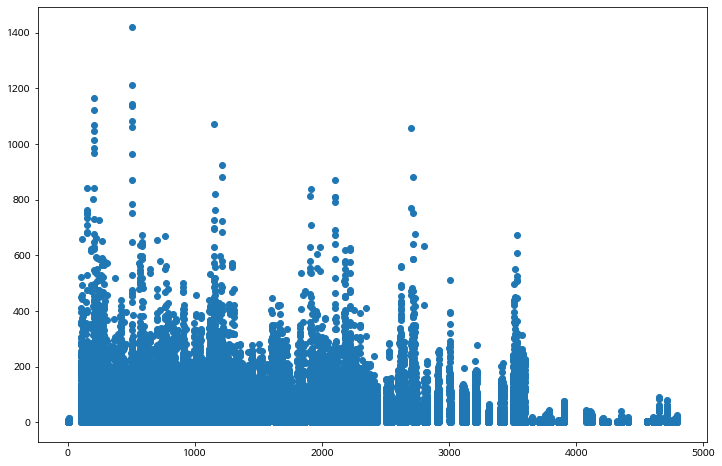

In [ ]:
x = np.array(total_data['대여소번호'])          #입력 데이터
y = np.array(total_data['이용건수'])    #출력 데이터
print(x.shape, y.shape) 

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.show()